## 2.2 MLP Baseline

In [28]:
import csv
import numpy as np

def csv_read(csv_path):
    """ Reading the results of k fold cross validation on the test dataset
    Args:
      csv_file: the path of the csv file
      
    Return:
      best_r2: best r2 score
      best_n_hidden: the number of hidden neurons coresponding to the best r2 score
    
    Remark:
      - The layout of each is that [mse_ave, rmse_ave, mae_ave, r2_ave]
      - In each column, the results are sorted by the number of hidden neurons.
    """
    with open(csv_path, 'r') as f:
        reader = csv.reader(f)
        mse_ave, rmse_ave, mae_ave, r2_ave = [], [], [], []
        for line in reader:
            mse_ave.append(float(line[0]))
            rmse_ave.append(float(line[1]))
            mae_ave.append(float(line[2]))
            r2_ave.append(float(line[3]))
        
        best_mse = mse_ave[np.argsort(mse_ave)[0]]
        best_rmse = rmse_ave[np.argsort(rmse_ave)[0]]
        best_mae = mae_ave[np.argsort(mae_ave)[0]]
        best_r2 = r2_ave[-2]
        best_n_hidden = (int(reader.line_num)-1) * 64
         
    return best_mse, best_rmse, best_mae, best_r2, best_n_hidden


log_path = "/home/ubuntu16/catkin_ws/src/sonar_navigation/Output/track-I-II/Best_Length/"
prefix = "2019_08_07_mlp_"
suffix = "_kfold_log.csv"

n=45078

mse, rmse, mae, r2 , ar2, n_hidden = [], [], [], [], [], []

for i in range(1,49,1):
    csv_path = log_path + prefix + str(i) + suffix
    best_mse, best_rmse, best_mae, best_r2, best_n_hidden = csv_read(csv_path)
    # compute adj_r2
    p = i*16
    best_ar2 = 1 - ((1-best_r2)*(n-1))/(n-p-1)
    
    mse.append(best_mse)
    rmse.append(best_rmse)
    mae.append(best_mae)
    r2.append(best_r2)
    ar2.append(best_ar2)
    n_hidden.append(best_n_hidden)

In [111]:
print(" rmse: {} \n mae: {} \n r2: {} \n ar2: {} \n".format( rmse[11], 
                                                                       mae[11], r2[11],
                                                                      ar2[11]))

 rmse: 0.0783169656992 
 mae: 0.0375905796885 
 r2: 0.845505571365 
 ar2: 0.844844706259 



In [26]:
r2=0.845505571365
n=45078
p=12*16

print 1 - (1-r2)*(n-1)/(n-1-p)

0.844844706259


In [29]:
r2=0.854160110402551
n=45078
p=12*16

print 1 - (1-r2)*(n-1)/(n-1-p)

0.853536265938


In [30]:
r2=0.878546745246136
n=45078
p=36*16

print 1 - (1-r2)*(n-1)/(n-1-p)

0.876974711477


In [17]:
from keras.models import Model 
from keras.layers import Input, Dense, Dropout

def mlp(input_dim, n_hidden):
    """ Define a mlp model with one hidden layer
    Args:
    - input_dim: dimensions of input tensor
    - n_hidden: number of hidden layer neurons

    return:
    - A model instance
    """

    # Input
    x = Input(shape=(input_dim, ))

    # hidden layer
    h1 = Dense(n_hidden, activation='relu')(x)
    h1 = Dropout(0.5)(h1)

    # output layer
    y = Dense(1)(h1)
        
    # model
    model = Model(inputs=x, outputs=y)

    return model

Using TensorFlow backend.


In [18]:
mlp_model = mlp(192,320)
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               61760     
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 321       
Total params: 62,081
Trainable params: 62,081
Non-trainable params: 0
_________________________________________________________________


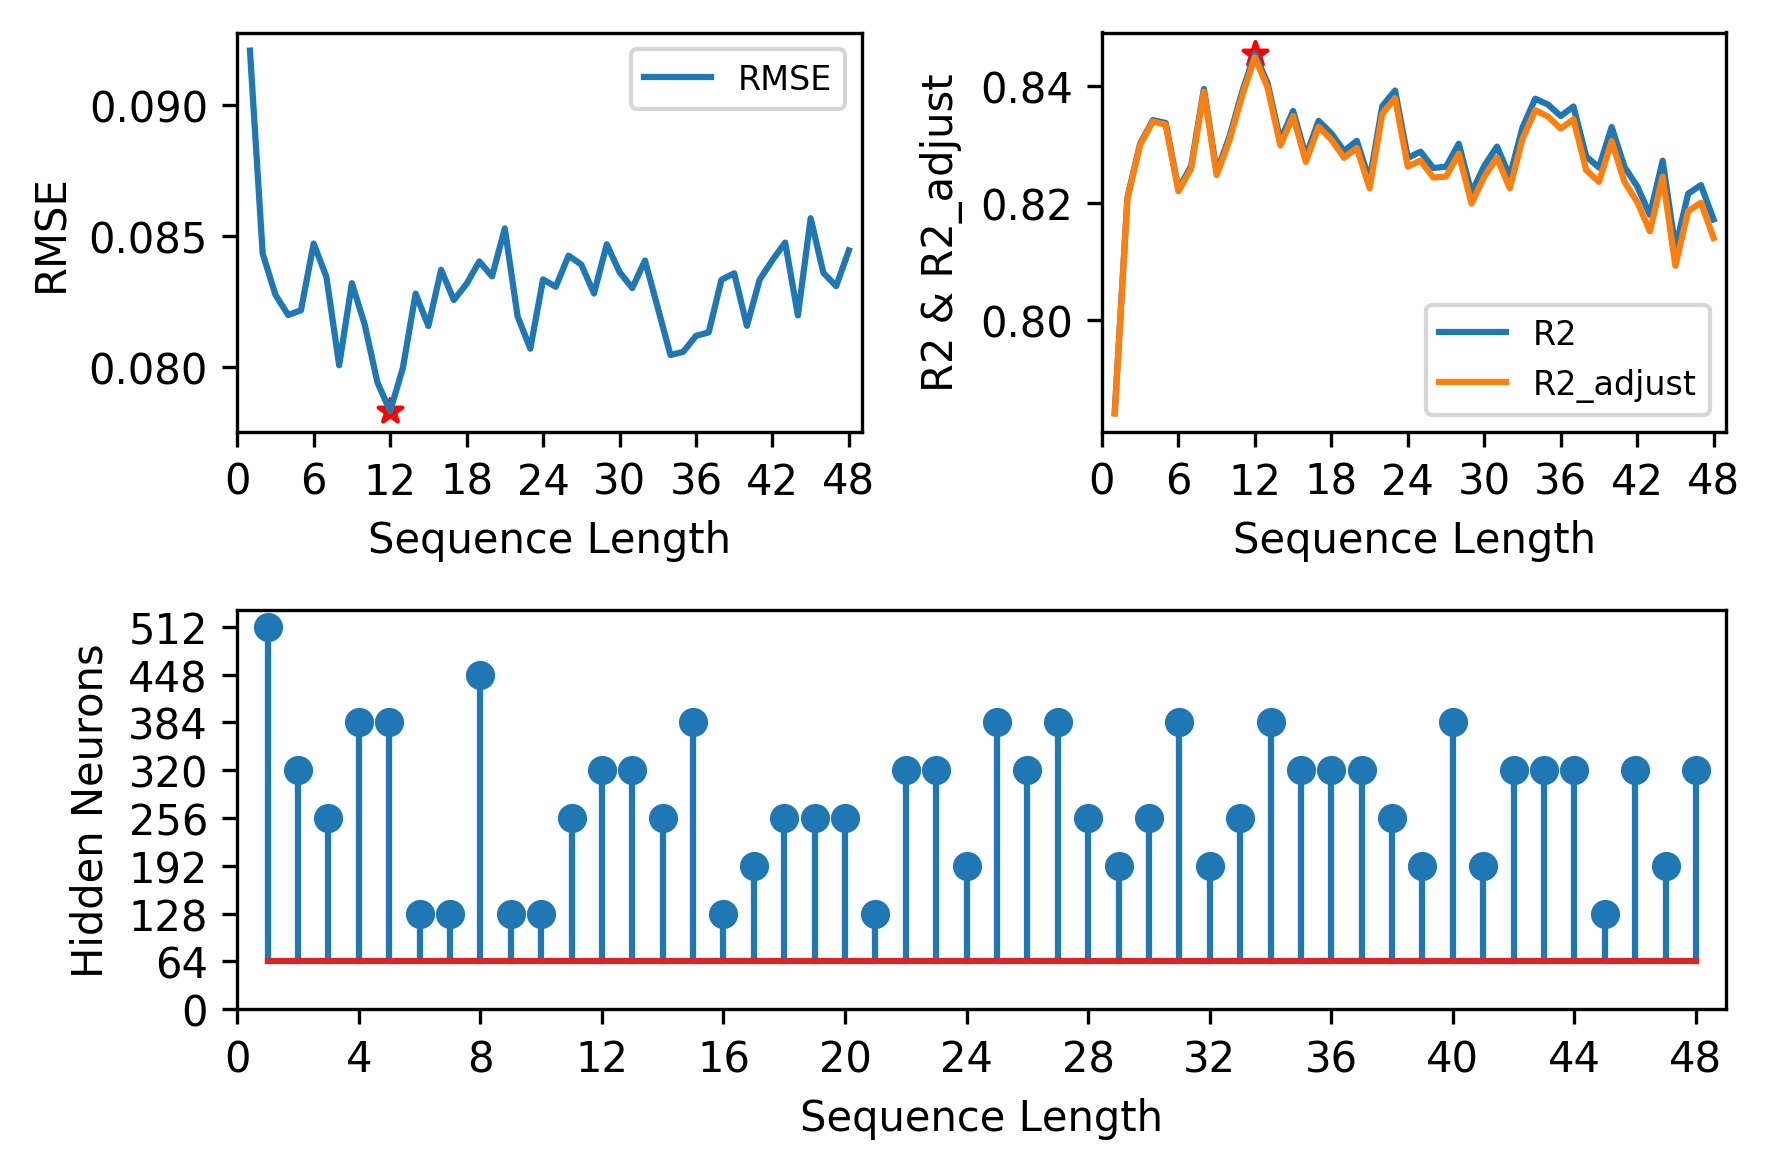

In [121]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,4), dpi=300)
gs1 = gridspec.GridSpec(2, 2)
#gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, :])

x = np.arange(1,49,1)
ax1.plot(x, rmse, label="RMSE")
ax1.scatter(x[11], rmse[11], c='red', marker='*')
ax1.set_xlim(0,49)
ax1.set_xticks(np.arange(0, 49, 6))
ax1.set_xlabel("Sequence Length")
ax1.set_ylabel("RMSE")
ax1.legend(prop={'size':8})

#ax12.plot(x, baseline_r_square)
ax2.plot(x, r2, label='R2')
ax2.plot(x, ar2, label='R2_adjust')
ax2.scatter(x[11], r2[11], c='red', marker='*')
ax2.set_xlim(0,49)
ax2.set_xticks(np.arange(0, 49, 6))
ax2.set_xlabel("Sequence Length")
ax2.set_ylabel("R2 & R2_adjust")
ax2.legend(loc="lower right", prop={'size':8})

ax3.stem(x, n_hidden, bottom=64)
ax3.set_xlim(0,49)
ax3.set_xticks(np.arange(0, 49, 4))
ax3.set_yticks(np.arange(0, 576, 64))
ax3.set_xlabel("Sequence Length")
ax3.set_ylabel("Hidden Neurons")

fig.tight_layout()
fig.savefig('best_sequence.png')

plt.show()

In [35]:
print np.argsort(mse)+1
print
print np.argsort(rmse)+1
print
print np.argsort(mae)+1
print
print np.argsort(r2)[::-1]+1
print
print np.argsort(ar2)[::-1]+1
print 
print n_hidden

[12 11 13  8 34 35 23 36 37 15 40 10 22 44  4  5 33 17  3 14 28 31 25 47
 18  9 38 41 24  7 20 39 46 30 16 27 19 32 42 26  2 48 29  6 43 21 45  1]

[12 11 13  8 34 35 23 36 37 15 40 10 22 44  4  5 33 17  3 14 28 31 25 47
 18  9 38 41 24  7 20 39 46 30 16 27 19 32 42 26  2 48 29  6 43 21 45  1]

[35 37 34 13 12 22 23 36 14 40 38 11 44 15  8 10 33 25 32 42 31  4 18 41
 28 26 24 27 47 20 17 46 48 16 39 29 30  9  5 19 43  3 21  7 45  6  2  1]

[12 13  8 23 11 34 35 22 37 15 36  4 17  5 40 33 18 10 14 20  3 28 31 19
 25 16 38 24 44 30  7 27 41 39 26  9 32 21 47 42  6 29 46  2 43 48 45  1]

[12 13  8 11 23 34 22 15 35 37  4  5 17 36 33 18 10 40  3 14 20 28 31 19
 25 16 24  7 38  9 27 44 30 26 41 39 21 32  6  2 42 47 29 46 43 48 45  1]

[512, 320, 256, 384, 384, 128, 128, 448, 128, 128, 256, 320, 320, 256, 384, 128, 192, 256, 256, 256, 128, 320, 320, 192, 384, 320, 384, 256, 192, 256, 384, 192, 256, 384, 320, 320, 320, 256, 192, 384, 192, 320, 320, 320, 128, 320, 192, 320]
